# Bezoekers in een pretpark
Een pretpark wil kunnen voorspellen hoeveel bezoekers er zullen komen in een bepaalde maand. Daarvoor hebben ze gedurende 4 jaar opgeschreven hoeveel bezoekers er waren, voor iedere maand. Je vindt deze data in “pretpark.csv”.  Deze data is ook direct leesbaar in Python (geen foute of ontbrekende data). Je moet wel zorgen dat de kolom `aantal_bezoekers` een float wordt.

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

pretpark = pd.read_csv('data/pretpark.csv', sep=';')
pretpark['aantal_bezoekers'] = pretpark['aantal_bezoekers'].astype(float)

display(pretpark)

,jaar,maand,aantal_bezoekers
0,1,1,120.0
1,1,2,89.0
2,1,3,492.0
3,1,4,586.0
4,1,5,1300.0
5,1,6,1173.0
6,1,7,1688.0
7,1,8,1715.0
8,1,9,528.0
9,1,10,247.0


1.	Maak een grafiek van de data. Wat merk je visueel op? Stijgt of daalt het aantal bezoekers? Is er een patroon herkenbaar?

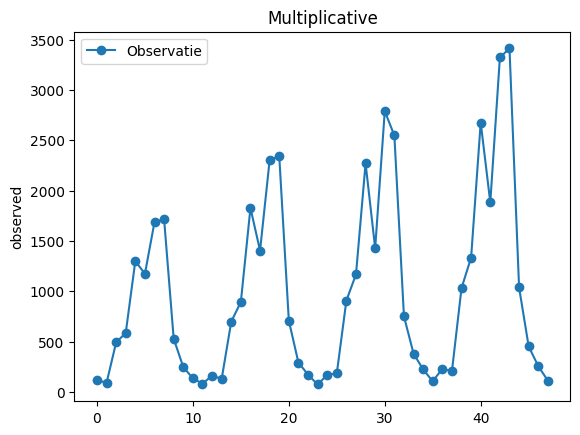

In [79]:
# Maak een grafiek van de data.
sd_model = seasonal_decompose(pretpark['aantal_bezoekers'], model='multiplicative', period=12)
fig, axes = plt.subplots(nrows=1, ncols=1)

axes.plot(sd_model.observed, 'o-', label='Observatie')
axes.set_ylabel('observed')
axes.set_title('Multiplicative')
axes.legend()
plt.show()

# Wat merk je visueel op?
# Er zijn 4 verschillende piekmomenten rond maand 9 en het stijgt elk jaar.

# Stijgt of daalt het aantal bezoekers?
# Het stijgt elk jaar.

# Is er een patroon herkenbaar?
# Er zijn 4 piekmomenten rond maand 9.

2.	Zou je het additief of multiplicatief model gebruiken?

In [3]:
# voer de decompositieanalyse uit op de tijdreeksgegevens
sd_model = seasonal_decompose(pretpark['aantal_bezoekers'], model='multiplicative', period=12)

# verkrijg de standaarddeviaties van de seizoens- en restcomponenten
seasonal_std = np.std(sd_model.seasonal)
residual_std = np.std(sd_model.resid)

# bereken de verhouding van de standaarddeviaties
std_ratio = seasonal_std / residual_std

# bepaal welk model geschikter is op basis van de verhouding van de standaarddeviaties
if std_ratio < 1:
    print("Het additieve model is geschikter.")
else:
    print("Het multiplicatieve model is geschikter.")

Het multiplicatieve model is geschikter.


3.	Wat is de grootte van 1 “seizoen”?

In [39]:
def smooth(y: np.array, m: int):
    result = np.empty(0)
    for i in range(y.size - m + 1):
        result = np.append(result, [np.mean(y[i:i + m])])

    return result

def find_trend(y: np.array, m: int):
    result = smooth(y, m)
    nan = [np.nan] * int(m / 2)
    if m % 2 == 0:
        result = smooth(result, 2)
        result = np.hstack([nan, result, nan])

    return result

def find_seasons(y: np.array, m: int, method='additive'):
    if method == 'multiplicative':
        seizoen_ruis = y / find_trend(y, m)
    else:
        seizoen_ruis = y - find_trend(y, m)

    n = seizoen_ruis.size

    seizoens_patroon = np.empty(0)
    # m groepjes middellen die telkens m stappen uit elkaar liggen
    for i in range(m):
        seizoens_patroon = np.append(seizoens_patroon, np.nanmean(seizoen_ruis[np.arange(i, n, m)]))

    # patroon herhalen over volledige periode
    return np.tile(seizoens_patroon, n // m)  # n // m is het aantal seizoenen.

seizoenen = find_seasons(pretpark['aantal_bezoekers'], 4, method='multiplicative')
print(seizoenen.reshape(-1,4))
# 0.907662

[[0.90766214 0.57461041 1.03397437 0.99162911]
 [0.90766214 0.57461041 1.03397437 0.99162911]
 [0.90766214 0.57461041 1.03397437 0.99162911]
 [0.90766214 0.57461041 1.03397437 0.99162911]
 [0.90766214 0.57461041 1.03397437 0.99162911]
 [0.90766214 0.57461041 1.03397437 0.99162911]
 [0.90766214 0.57461041 1.03397437 0.99162911]
 [0.90766214 0.57461041 1.03397437 0.99162911]
 [0.90766214 0.57461041 1.03397437 0.99162911]
 [0.90766214 0.57461041 1.03397437 0.99162911]
 [0.90766214 0.57461041 1.03397437 0.99162911]
 [0.90766214 0.57461041 1.03397437 0.99162911]]


4.	Doe nu een decompositie.  Plot deze in een diagram.

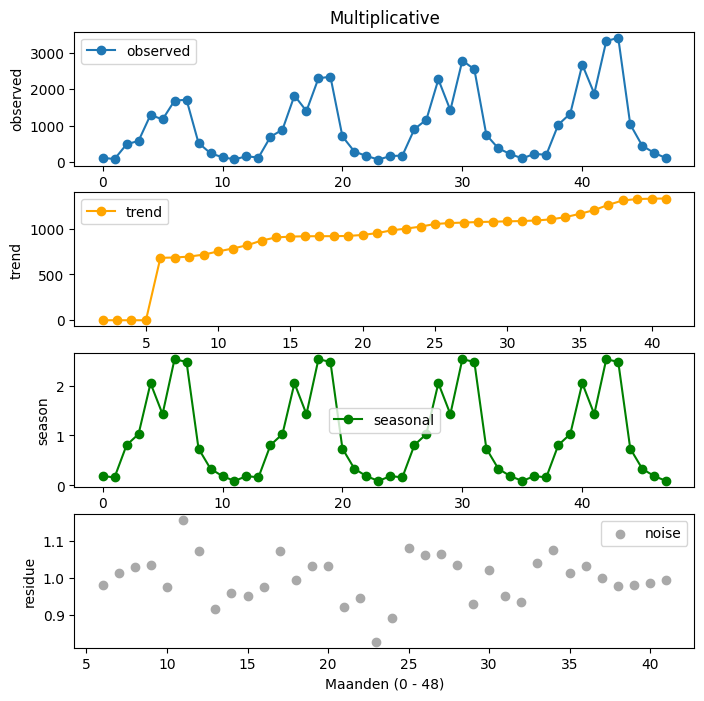

In [58]:
def plot_seasonal_decompositon(sd_model, title: str):
    fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(8, 8))

    axes[0].plot(sd_model.observed, 'o-', label='observed')
    axes[0].set_ylabel('observed')
    axes[0].set_title(title)
    axes[0].legend()

    axes[1].plot(sd_model.trend, 'o-', color='orange', label='trend')
    axes[1].set_ylabel('trend')
    axes[1].legend()

    axes[2].plot(sd_model.seasonal, 'o-', color='green', label='seasonal')
    axes[2].set_ylabel('season')
    axes[2].legend()

    axes[3].scatter(range(sd_model.nobs[0]), sd_model.resid, color='darkgrey', label='noise')
    axes[3].set_ylabel('residue')
    axes[3].set_xlabel('Maanden (0 - 48)')
    axes[3].legend()

plot_seasonal_decompositon(sd_model, 'Multiplicative')
# sd_model.observed
# sd_model.trend
# sd_model.seasonal
# sd_model.resid

5.	We gaan nu een model maken om voorspellingen te doen naar de toekomst. Doe een lineaire regressie op de trend en bepaal de slope en de intercept. Welke vergelijking vind je voor de trend?

6.	Bereken de waarden van de trend voor het komende jaar.  Welke waarden kom je uit?

7.	Wat zijn de waarden van het seizoen?

8.	Vermenigvuldig de trend-waarden nu met het patroon. Je hebt nu een schatting van het aantal bezoekers voor het volgende jaar.  Welke waarden kom je uit (rond de waarden af op een geheel getal)?

9.	Wat is de MAE, RMSE en de MAPE? Wat is de betekenis van de MAPE?